In [1]:
import os
import json

# Get the current working directory
cwd = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))

# Path to the directory containing train2014 images
image_dir = os.path.join(parent_dir, "Image-Captioning", "COCO_dataset", "train2014")

# Path to the captions mapping JSON file
json_file = os.path.join(parent_dir, "Image-Captioning", "COCO_dataset", "captions_mapping_train.json")


In [2]:
with open(json_file, "r") as f:
    captions_mapping = json.load(f)

In [3]:
image_files = os.listdir(image_dir)

In [4]:
os.path.join(image_dir, image_files[0])

'/Users/thilakcm/Downloads/UMD stuff/spring 2024/NLP/project/Image-Captioning/COCO_dataset/train2014/COCO_train2014_000000223373.jpg'

In [5]:
len(captions_mapping), len(image_files)

(68363, 68363)

In [6]:
# for image_file in image_files:
#     image_path = 'COCO_dataset/val2014/' + image_file
#     if image_path not in captions_mapping:
#         os.remove(image_path)
#         print(f"Image {image_path} deleted.")

In [7]:
if len(captions_mapping) == len(image_files):
    print("There is a match")
else:
    print('No match')

There is a match


In [8]:
len(captions_mapping), len(image_files)

(68363, 68363)

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [13]:
base_model = EfficientNetB0(weights='imagenet', include_top=False)


In [14]:
base_model.trainable = False
base_model_out = base_model.output
base_model_out = tf.keras.layers.Reshape((-1, 1280))(base_model_out)
cnn_model = tf.keras.Model(inputs=base_model.input, outputs=base_model_out)

In [58]:
image_path = 'dog.jpeg'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

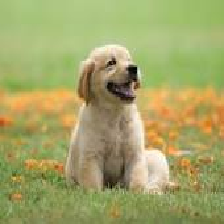

In [59]:
img

In [60]:
img_array.shape

(224, 224, 3)

In [61]:
cnn_model(img_array).shape


TensorShape([1, 49, 1280])

In [ ]:
predictions = efficientnet_model.predict(tf.expand_dims(img_array, axis=0))

# Decode predictions
decoded_predictions = tf.keras.applications.efficientnet.decode_predictions(predictions)


In [ ]:
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i+1}: {label} ({score:.2f})")

In [1]:
1+1

2